In [2]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep='\t')

chipotle_data.head()

chipotle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [3]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [4]:
chipotle_data.groupby('item_name')['quantity'].nlargest(1)

item_name                                  
6 Pack Soft Drink                      3389     2
Barbacoa Bowl                          39       1
Barbacoa Burrito                       21       1
Barbacoa Crispy Tacos                  1903     2
Barbacoa Salad Bowl                    1229     1
Barbacoa Soft Tacos                    56       1
Bottled Water                          4152    10
Bowl                                   445      3
Burrito                                510      1
Canned Soda                            2235     4
Canned Soft Drink                      3973     4
Carnitas Bowl                          3480     3
Carnitas Burrito                       2581     2
Carnitas Crispy Tacos                  3890     2
Carnitas Salad                         3750     1
Carnitas Salad Bowl                    1132     1
Carnitas Soft Tacos                    237      1
Chicken Bowl                           409      3
Chicken Burrito                        1254     4
Chicke

In [5]:
#Finds the most ordered item in the Chipotle dataset and how many exactly
most_ordered_item = chipotle_data.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
print(most_ordered_item)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64


In [6]:
#Finds total revenue generated from the Chipotle dataset
chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
chipotle_data['total_price'] = chipotle_data['item_price'] * chipotle_data['quantity']
total_revenue = chipotle_data['total_price'].sum()
print("Total revenue: $" + str(total_revenue))

Total revenue: $39237.02


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\zicai\AppData\Local\Temp\ipykernel_10824\4000611257.py:2: SyntaxWarning: invalid escape sequence '\$'
  chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)


In [7]:
#Finds the total number of orders placed in the Chipotle dataset
# This counts the unique order IDs to determine the total number of orders
total_orders_placed = chipotle_data['order_id'].nunique()
print("Total orders placed: " + str(total_orders_placed))

Total orders placed: 1834


In [8]:
# Finds the number of orders with item price greater than $10

orders_more_than_ten = chipotle_data[chipotle_data['item_price'] > 10]
print("Orders with item price greater than $10: " + str(len(orders_more_than_ten)))

Orders with item price greater than $10: 1130


In [9]:
chipotle_data['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

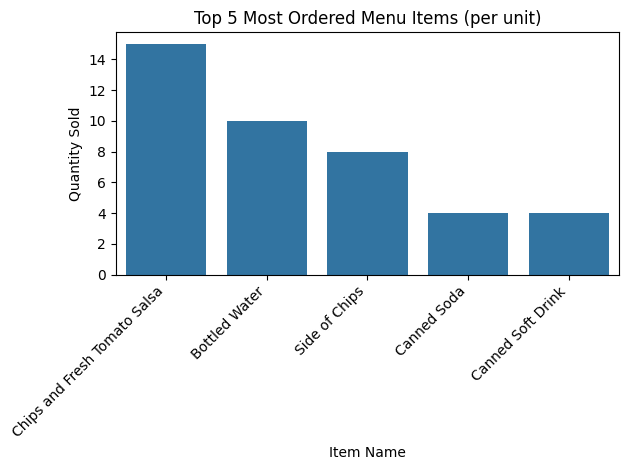

In [10]:
#Creates a bar graph of the top 5 most ordered menu items

top_five_items_sold = chipotle_data.groupby('item_name')['quantity'].max().nlargest(5)

data = top_five_items_sold.reset_index()

seaborn.barplot(x='item_name', y='quantity', data = data)
plt.title("Top 5 Most Ordered Menu Items (per unit)")
plt.xlabel('Item Name')
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

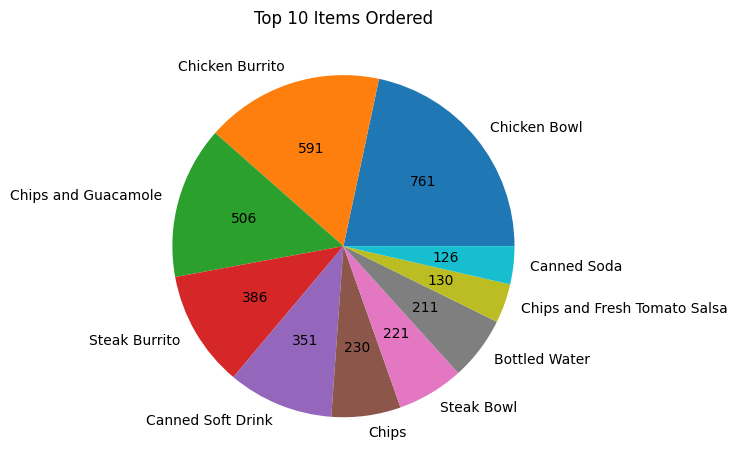

In [13]:
# Pie chart of the top 10 most ordered items, showing integer counts
top10 = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(10)

def absolute_value(val):
    a = int(round(val/100*top10.sum()))
    return f"{a}"

plt.pie(top10, labels=top10.index, autopct=absolute_value)
plt.title("Top 10 Items Ordered")
plt.tight_layout()
plt.show()

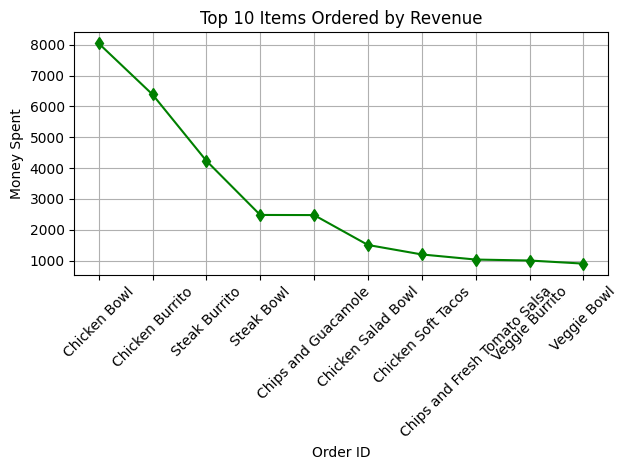

In [ ]:
top10_money = chipotle_data.groupby('item_name')['total_price'].sum().nlargest(10)

def absolute_value_money(val):
    a = int(round(val/100*top10_money.sum()))
    return f"${a}"

plt.plot(top10_money.index, top10_money.values, marker='d', linestyle='-', color='green')
plt.grid(True)
plt.title("Top 10 Items Ordered by Revenue")
plt.xlabel('Order ID')
plt.ylabel('Money Spent')
plt.xticks(top10_money.index, rotation=45)
plt.tight_layout()
plt.show()

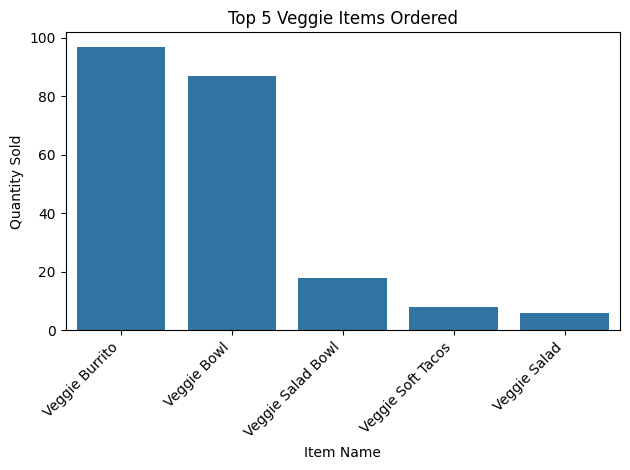

In [26]:
#What are the top 5 veggie items ordered?
top_veggie_items = chipotle_data[chipotle_data['item_name'].str.contains('Veggie')]
top_veggie_items = top_veggie_items.groupby('item_name')['quantity'].sum().nlargest(5)
data_veggie = top_veggie_items.reset_index()
seaborn.barplot(x='item_name', y='quantity', data=data_veggie)
plt.title("Top 5 Veggie Items Ordered")
plt.xlabel('Item Name')
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()